In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
tf.__version__

'2.3.0'

In [3]:
train_datagen=ImageDataGenerator(
     rescale=1./255,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True
  )

In [4]:
training_set=train_datagen.flow_from_directory(
             r'C:\Users\Asus\Documents\datascience\project\cnn\dataset\training_set', 
             target_size=(64,64),
             batch_size=32,
             class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
testing_set=train_datagen.flow_from_directory(
             r'C:\Users\Asus\Documents\datascience\project\cnn\dataset\test_set', 
             target_size=(64,64),
             batch_size=32,
             class_mode='binary')

Found 2000 images belonging to 2 classes.


In [6]:
cnn=tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
cnn.fit(x=training_set,validation_data=testing_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 139s 558ms/step - loss: 0.6728 - accuracy: 0.5751 - val_loss: 0.6462 - val_accuracy: 0.6135
Epoch 2/25
250/250 [==============================] - 124s 497ms/step - loss: 0.6268 - accuracy: 0.6560 - val_loss: 0.5948 - val_accuracy: 0.7020
Epoch 3/25
250/250 [==============================] - 120s 481ms/step - loss: 0.5796 - accuracy: 0.6944 - val_loss: 0.5569 - val_accuracy: 0.7190
Epoch 4/25
250/250 [==============================] - 95s 381ms/step - loss: 0.5593 - accuracy: 0.7074 - val_loss: 0.5359 - val_accuracy: 0.7440
Epoch 5/25
250/250 [==============================] - 37s 150ms/step - loss: 0.5263 - accuracy: 0.7349 - val_loss: 0.5348 - val_accuracy: 0.7410
Epoch 6/25
250/250 [==============================] - 42s 166ms/step - loss: 0.5080 - accuracy: 0.7471 - val_loss: 0.5489 - val_accuracy: 0.7175
Epoch 7/25
250/250 [==============================] - 41s 163ms/step - loss: 0.4861 - accuracy: 0.7655 - val_loss: 0.5107 - val

In [15]:
test_image=image.load_img(r'C:\Users\Asus\Documents\datascience\project\cnn\dataset\single_prediction\cat_or_dog_3.jpg',target_size=(64,64))

In [16]:
test_image=image.img_to_array(test_image)

In [17]:
test_image=np.expand_dims(test_image,axis=0)

In [18]:
result=cnn.predict(test_image)

if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'


In [19]:
test_img=image.load_img(r'C:\Users\Asus\Documents\datascience\project\cnn\dataset\single_prediction\cat_or_dog_3.jpg',target_size=(256,256))

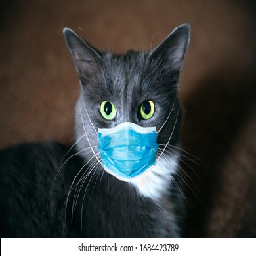

In [20]:
test_img

In [21]:
print(prediction)

cat


In [22]:
result

array([[0.]], dtype=float32)

In [23]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [24]:
filename="model1.h5"
cnn.save(filename)

In [25]:
from tensorflow.keras.models import load_model
loaded_model=load_model(filename)
loaded_model.predict(test_image)

if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [26]:
print(prediction)

cat
